<a href="https://colab.research.google.com/github/Pragya1712/Machine-Learning-Hand-Code/blob/main/Model_Evaluation_and_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
np.set_printoptions(precision=3)
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)
np.random.seed(1)

In [ ]:
# Create Regression Dataset
x = np.linspace(0,10,100)
y = 2*x + 0.5*x**2 + np.random.normal(0,5,size=x.shape)
x= x.reshape(-1,1)
y=y.reshape(-1,1)


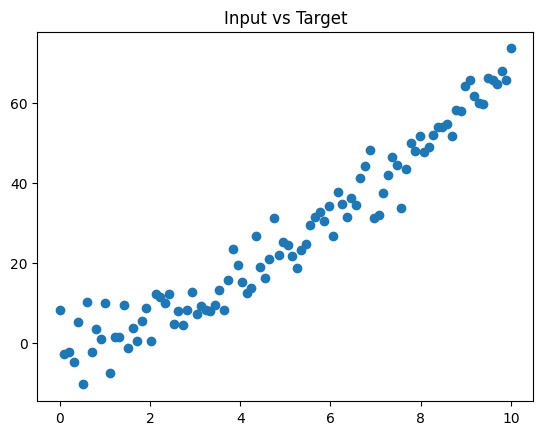

In [ ]:
# Visualization
plt.scatter(x,y)
plt.title("Input vs Target")
plt.show()

In [ ]:
# Splitting of data
x_train,x_,y_train,y_ = train_test_split(x,y,test_size = 0.4,random_state=1)
x_cv,x_test,y_cv,y_test = train_test_split(x_,y_,test_size=0.5,random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
# Linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled,y_train)
yhat_train = linear_model.predict(X_train_scaled)
print("Training MSE: ", mean_squared_error(y_train,yhat_train)/2)

Training MSE:  16.44110226916701


In [ ]:
X_cv_scaled = scaler.transform(x_cv)
yhat_cv = linear_model.predict(X_cv_scaled)
print("CV MSE:", mean_squared_error(y_cv, yhat_cv)/2)

CV MSE: 11.88701217273513


In [ ]:
yhat_test = linear_model.predict(x_test)
print("Test MSE:", mean_squared_error(y_test, yhat_test)/2)

Test MSE: 7333.429586125169


In [ ]:
train_mses = []
cv_mses = []
degrees = range(1,11)


In [ ]:
for degree in degrees:
  poly = PolynomialFeatures(degree, include_bias=False)
  X_train_poly = poly.fit_transform(x_train)
  X_cv_poly = poly.transform(x_cv)
  scaler = StandardScaler()
  X_train_poly = scaler.fit_transform(X_train_poly)
  X_cv_poly = scaler.transform(X_cv_poly)
  model = LinearRegression()
  model.fit(X_train_poly, y_train)
  train_mses.append(mean_squared_error(y_train, yhat_train)/2)
  cv_mses.append(mean_squared_error(y_cv, yhat_cv)/2)



Best degree: 1


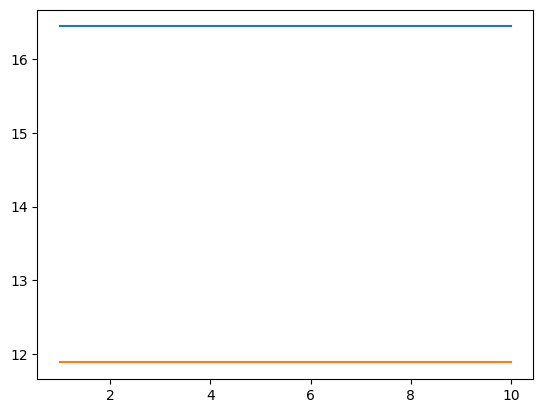

In [ ]:
plt.plot(degrees, train_mses, label="Training MSE")
plt.plot(degrees, cv_mses, label="CV MSE")
best_degree = np.argmin(cv_mses) + 1
print("Best degree:", best_degree)


In [ ]:
poly = PolynomialFeatures(best_degree, include_bias=False)
yhat_test = linear_model.predict(x_test)
print("Test MSE:", mean_squared_error(y_test, yhat_test)/2)


Test MSE: 7333.429586125169


In [ ]:
# For Neural Networks
def build_nn_models():
     models = []

     m1 = Sequential([
         Dense(10, activation='relu'),
         Dense(1)
     ])

     m2 = Sequential([
         Dense(20, activation='relu'),
         Dense(10, activation='relu'),
         Dense(1)
     ])

     m3 = Sequential([
         Dense(50, activation='relu'),
         Dense(20, activation='relu'),
         Dense(1)
     ])

     return [m1, m2, m3]

models = build_nn_models()





In [ ]:
for model in models:
  model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(0.01))
  model.fit(X_train_scaled,y_train,epochs=100)
  train_mse = mean_squared_error(y_train,model.predict(X_train_scaled))/2
  cv_mse = mean_squared_error(y_cv,model.predict(X_cv_scaled))/2
  print(model.name,"Train MSE: ",train_mse,"CV MSE: ",cv_mse)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 1095.7142
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1035.2588
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 975.0457
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1050.5544
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 978.2515
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1068.8093
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1092.4958
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 967.5433
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1054.6135
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1009.1375
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 998.7094
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 1028.1473
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1012.7974
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1004.7176
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/s

In [ ]:
yhat_test = linear_model.predict(x_test)
print("Test MSE:", mean_squared_error(y_test, yhat_test)/2)

Test MSE: 7333.429586125169


In [ ]:
# For classification
from sklearn.datasets import make_classification
X_bc, y_bc = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=1
)

y_bc = y_bc.reshape(-1, 1)

print("Input shape:", X_bc.shape)
print("Target shape:", y_bc.shape)


Input shape: (300, 2)
Target shape: (300, 1)


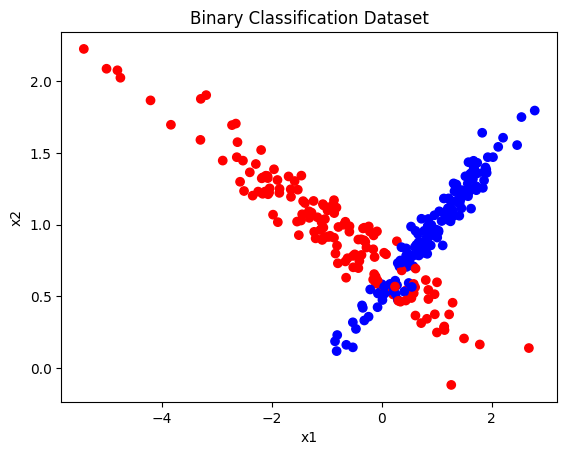

In [ ]:
plt.scatter(X_bc[:,0], X_bc[:,1], c=y_bc, cmap='bwr')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Binary Classification Dataset")
plt.show()


In [ ]:
x_bc_train, x_, y_bc_train, y_ = train_test_split(
    X_bc, y_bc, test_size=0.4, random_state=1
)

x_bc_cv, x_bc_test, y_bc_cv, y_bc_test = train_test_split(
    x_, y_, test_size=0.5, random_state=1
)


In [ ]:
scaler = StandardScaler()
x_bc_train = scaler.fit_transform(x_bc_train)
x_bc_cv = scaler.transform(x_bc_cv)
x_bc_test = scaler.transform(x_bc_test)


In [ ]:
probabilities = np.array([0.2, 0.6, 0.7, 0.3, 0.8])
predictions = np.where(probabilities >= 0.5, 1, 0)
ground_truth = np.array([1, 1, 1, 1, 1])

print("Probabilities:", probabilities)
print("Predictions:", predictions)
print("Error rate:", np.mean(predictions != ground_truth))



Probabilities: [0.2 0.6 0.7 0.3 0.8]
Predictions: [0 1 1 0 1]
Error rate: 0.4


In [ ]:
def build_models():
    models = []

    m1 = Sequential([
        Dense(10, activation='relu'),
        Dense(1)
    ], name="NN_1")

    m2 = Sequential([
        Dense(20, activation='relu'),
        Dense(10, activation='relu'),
        Dense(1)
    ], name="NN_2")

    m3 = Sequential([
        Dense(50, activation='relu'),
        Dense(20, activation='relu'),
        Dense(1)
    ], name="NN_3")

    return [m1, m2, m3]


In [ ]:
nn_train_error = []
nn_cv_error = []

models_bc = build_models()

for model in models_bc:
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01)
    )

    print(f"Training {model.name}...")
    model.fit(x_bc_train, y_bc_train, epochs=200, verbose=0)

    threshold = 0.5

    yhat = tf.sigmoid(model.predict(x_bc_train))
    train_error = np.mean((yhat >= threshold) != y_bc_train)
    nn_train_error.append(train_error)

    yhat = tf.sigmoid(model.predict(x_bc_cv))
    cv_error = np.mean((yhat >= threshold) != y_bc_cv)
    nn_cv_error.append(cv_error)

    print("Done\n")


Training NN_1...
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Done

Training NN_2...
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Done

Training NN_3...
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Done



In [ ]:
for i in range(len(nn_train_error)):
    print(
        f"Model {i+1}: Train Error={nn_train_error[i]:.4f}, "
        f"CV Error={nn_cv_error[i]:.4f}"
    )


Model 1: Train Error=0.0278, CV Error=0.0833
Model 2: Train Error=0.0111, CV Error=0.0667
Model 3: Train Error=0.0111, CV Error=0.0333


In [ ]:
best_model = np.argmin(nn_cv_error)

yhat = tf.sigmoid(models_bc[best_model].predict(x_bc_test))
test_error = np.mean((yhat >= 0.5) != y_bc_test)

print("\nSelected Model:", best_model + 1)
print("Test Error:", test_error)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Selected Model: 3
Test Error: 0.08333333333333333
